### Chandra Deep Field Redshift vs H20 Redshift

This notebook will plot the redshift of matched objects from the chandra deep field and the H20 dataset in order to assess the accuracy of LYR matches

In [37]:
import sys
sys.path.append("./utils")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

from data_loader import DataLoader

In [38]:
eROSITA_file_path = "/Users/admin/Documents/GitHub/H20-eROSITA-Matched-Catalog-Analysis/src/data/eRASS1_Main.v1.1.fits"
h2O_file_path = "/Users/admin/Documents/GitHub/H20-eROSITA-Matched-Catalog-Analysis/src/data/DAWN_EDFF_DR1.fits"

merged_catalog_h20_cdfs_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_final/merged_catalog_h20_cdfs.csv"
lyr_output_h20_cdfs_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_lyr/output/LR_Final_XJ_h20_cdfs.txt"


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [39]:
matched_catalog_h20_cdfs = np.genfromtxt(lyr_output_h20_cdfs_path)

matched_catalog_h20_cdfs = pd.DataFrame(
    matched_catalog_h20_cdfs,
    columns=[
        "OutID",
        "RAout",
        "DECout",
        "mag_out",
        "InID",
        "RAin",
        "DECin",
        "mag_in",
        "r",
        "f(r)",
        "df",
        "f(df)",
        "q(m)",
        "n(m)",
        "LR",
        "Rel",
        "flag"
    ]
)

In [40]:
matched_catalog_h20_cdfs.sort_values(by='OutID').reset_index(drop=True).head()

,OutID,RAout,DECout,mag_out,InID,RAin,DECin,mag_in,r,f(r),df,f(df),q(m),n(m),LR,Rel,flag
0,0.0,52.899178,-27.859588,0.0,458725.0,52.899829,-27.860406,0.0572,3.765,1.017000e-53,0.0,1.0,0.3487,0.002427,1.461000e-51,0.000,0.0
1,0.0,52.899178,-27.859588,0.0,458822.0,52.899085,-27.859726,1.6110,0.600,1.213000e-01,0.0,1.0,0.3487,0.002427,1.743000e+01,0.998,1.0
2,0.0,52.899178,-27.859588,0.0,458955.0,52.899275,-27.858235,0.0611,4.883,3.663000e-90,0.0,1.0,0.3487,0.002427,5.264000e-88,0.000,0.0
3,0.0,52.899178,-27.859588,0.0,458957.0,52.899675,-27.858643,0.4009,3.842,6.103000e-56,0.0,1.0,0.3487,0.002427,8.769000e-54,0.000,0.0
4,1.0,52.911023,-27.892965,0.0,456375.0,52.911016,-27.892986,1.0902,0.079,2.617000e+00,0.0,1.0,0.3487,0.002427,3.761000e+02,1.000,1.0


In [41]:
merged_catalog_h20_cdfs = pd.read_csv(merged_catalog_h20_cdfs_path)
merged_catalog_h20_cdfs.head()

,OutID,InID,ID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,GROUP_ID,N_GROUP,MODEL_FLAG,SOLUTION_MODEL,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_NB0816_MAG,HSC_NB0816_MAGERR,HSC_NB0816_FLUX,HSC_NB0816_FLUXERR,HSC_NB0816_CHISQ,HSC_NB0816_DRIFT,HSC_NB0816_VALID,HSC_NB0921_MAG,HSC_NB0921_MAGERR,HSC_NB0921_FLUX,HSC_NB0921_FLUXERR,HSC_NB0921_CHISQ,HSC_NB0921_DRIFT,HSC_NB0921_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,lp_zPDF,lp_zPDF_l68,lp_zPDF_u68,lp_zMinChi2,lp_chi2_best,lp_zp_2,lp_chi2_2,lp_NbFilt,lp_zq,lp_chiq,lp_modq,lp_mods,lp_chis,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,lp_SFR_med_min68,lp_SFR_med_max68,lp_SFR_best,lp_sSFR_med,lp_sSFR_med_min68,lp_sSFR_med_max68,lp_sSFR_best,ez_z_phot,ez_z_phot_chi2,ez_z_phot_risk,ez_z_min_risk,ez_min_risk,ez_z_raw_chi2,ez_raw_chi2,ez_z_ml,ez_z_ml_chi2,ez_z_ml_risk,ez_z025,ez_z160,ez_z500,ez_z840,ez_z975,ez_nusefilt,ez_lc_min,ez_lc_max,ez_star_min_chi2,ez_star_teff,Seq,RAJ2000,DEJ2000,logPB,WAV,errPos,Angle,FB,e_FB,e_fb_lc,SB,e_SB,e_sb_lc,HB,e_HB,e_hb_lc,Ph,CPCat,CPoff,CPNote,RAWdeg,DEWdeg,RmagW,RAGSdeg,DEGSdeg,zmagGS,RAGdeg,DEGdeg,zmagG,RACdeg,DECdeg,F125Wmag,RATdeg,DETdeg,KsmagT,RASdeg,DESdeg,_3_6mag,RAVdeg,DEVdeg,VLAmag,zspec,q_zspec,r_zspec,zL10,zR11,zH14,zS14,zS15,zS16,zF,r_zF,e_zF,e_zf_lc,FExp,SExp,HExp,BR,e_BR,e_br_lc,Gamma,e_Gamma,e_gamma_lc,FFB,FSB,FHB,LX,NH,LXc,OType,f_X11ID,X11ID,f_X16ID,X16ID,R13ID,recno
0,0,458725,458726,52.899829,-27.860406,20607.481001,17156.227004,0.168218,0.168282,52.899832,-27.860399,55_9713,6658,1,0.0,PointSource,0.007665,0.057187,0.015812,27.006761,0.301103,0.531504,0.000453,True,0.065069,0.009948,26.866569,0.166497,1.616175,0.000597,True,0.074287,0.006252,26.722711,0.091646,1.313538,0.001628,True,0.079175,0.007635,26.653536,0.105014,0.767693,0.003491,True,0.126315,0.042355,26.146360,0.365154,0.829600,0.000815,True,27.581066,2.209107,0.033696,0.068354,2.656130,0.000142,True,26.671068,0.530833,0.077906,0.037975,1.787989,0.000724,True,0.210487,0.012518,25.591936,0.064762,0.431466,0.004166,True,0.218613,0.012286,25.550809,0.061203,1.006775,0.009035,True,1.9199,1.4363,2.5233,1.908,0.376071,1.49,0.466871,7,2.75,1.87288,30,136,33.0552,5,6.405000e+08,0.1,0,-17.94449,-19.05050,-19.09049,8.60993,8.40796,8.76251,8.69754,0.06632,-0.13871,0.39098,0.03163,-8.53839,-8.89718,-8.02381,-8.666,1.871609,0.277045,0.557234,1.959440,0.556038,1.363161,0.071262,1.363657,0.071283,0.617156,0.353315,1.095857,1.871609,2.696072,3.316503,7,3640.981999,45020.337852,33.30192,3700.0,1,52.899178,-27.859588,0.0,-8,0.53,12.04,886.7,38.2,39.3,604.3,28.2,29.4,282.9,26.1,27.3,E,GEMS,0.52,,52.899048,-27.859669,21.97,0.0,0.0,0.0,52.899028,-27.859646,22.27,0.0,0.0,0.0,52.899017,-27.859646,20.70,52.899053,-27.859624,20.25,0.0,0.0,0.0,1.628,Secure,16,1.63,1.64,1.62,0.0,0.0,0.0,1.628,zSpec,0.00,0.00,120000.0,110000.0,130000.0,0.374,0.038,0.04,1.78,0.1,0.11,2.400000e-14,1.100000e-14,1.300000e-14,3.600000e+44,8.900000e+20,3.800000e+44,AGN,,1,,127,1059,1
1,0,458822,458823,52.899085,-27.859726,20621.585139,17170.794960,0.003822,0.004051,52.899084,-27.859724,55_9804,6672,1,0.0,ExpGalaxy,0.007664,1.611016,0.013837,23.382250,0.009353,0.898824,0.017911,True,3.810336,0.010238,22.447592,0.002926,1.017300,0.027875,True,2.952419,0.006897,22.724555,0.002544,1.556026,0.003955,True,4.174383,0.008332,22.348519

### Redshifts of CDFS and H20 Matches

In [42]:
redshift_h20_cdfs = merged_catalog_h20_cdfs[['lp_zPDF','zspec']].join(matched_catalog_h20_cdfs[['Rel','LR']])
redshift_h20_cdfs = redshift_h20_cdfs[redshift_h20_cdfs['zspec'] != 0.0]
redshift_h20_cdfs.head()

,lp_zPDF,zspec,Rel,LR
0,1.9199,1.628,0.000,1.461000e-51
1,2.0269,1.628,0.998,1.743000e+01
2,1.9698,1.628,0.000,5.264000e-88
3,1.3547,1.628,0.000,8.769000e-54
6,0.9484,2.713,0.000,1.748000e-09


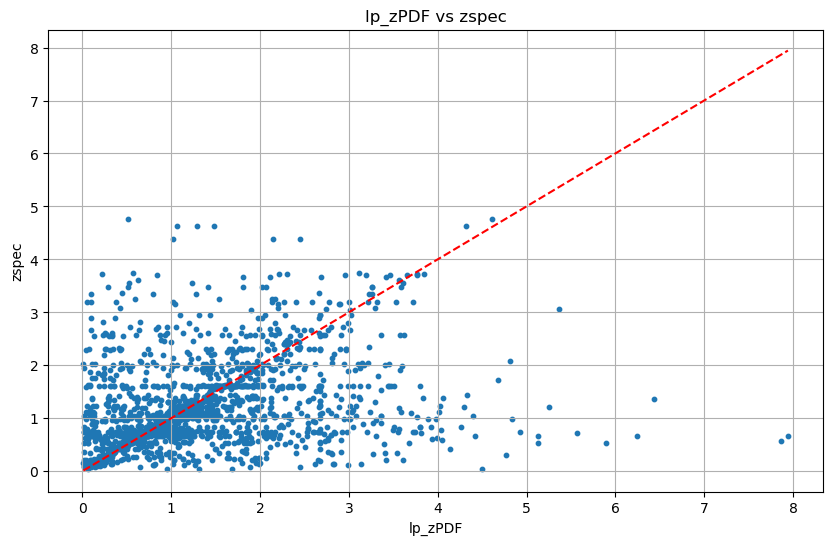

In [43]:
plt.figure(figsize=(10, 6))
x_values = np.linspace(
    min(
        redshift_h20_cdfs["lp_zPDF"].min(), 
        redshift_h20_cdfs["zspec"].min()
    ), 
    max(
        redshift_h20_cdfs["lp_zPDF"].max(), 
        redshift_h20_cdfs["zspec"].max()
    ), 
    100,
)

plt.plot(x_values, x_values, color='red', linestyle='--', label='x=y line')
plt.scatter(redshift_h20_cdfs["lp_zPDF"], redshift_h20_cdfs["zspec"], s=10)
plt.xlabel('lp_zPDF')
plt.ylabel('zspec')
plt.title('lp_zPDF vs zspec')
plt.grid(True)
plt.show()

### Plotting LR and Rel with respect to redshift

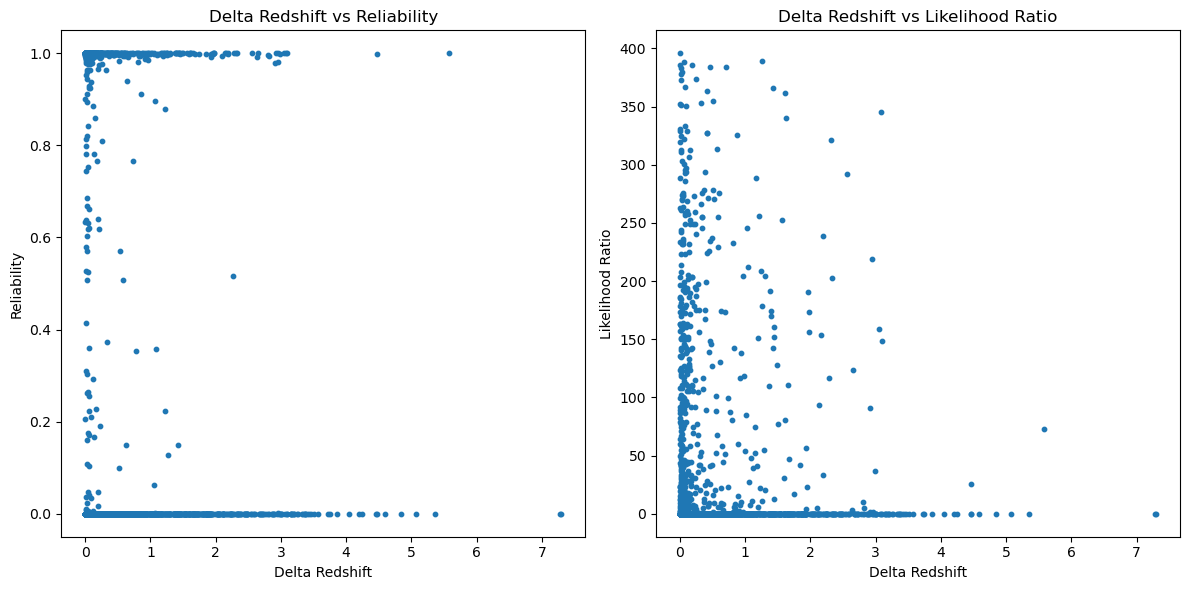

In [44]:
delta_redshift = abs(redshift_h20_cdfs["lp_zPDF"] - redshift_h20_cdfs["zspec"])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(delta_redshift, redshift_h20_cdfs['Rel'], s=10)
axs[0].set_xlabel('Delta Redshift')
axs[0].set_ylabel('Reliability')
axs[0].set_title('Delta Redshift vs Reliability')

axs[1].scatter(delta_redshift, redshift_h20_cdfs['LR'], s=10)
axs[1].set_xlabel('Delta Redshift')
axs[1].set_ylabel('Likelihood Ratio')
axs[1].set_title('Delta Redshift vs Likelihood Ratio')

plt.tight_layout()
plt.show()

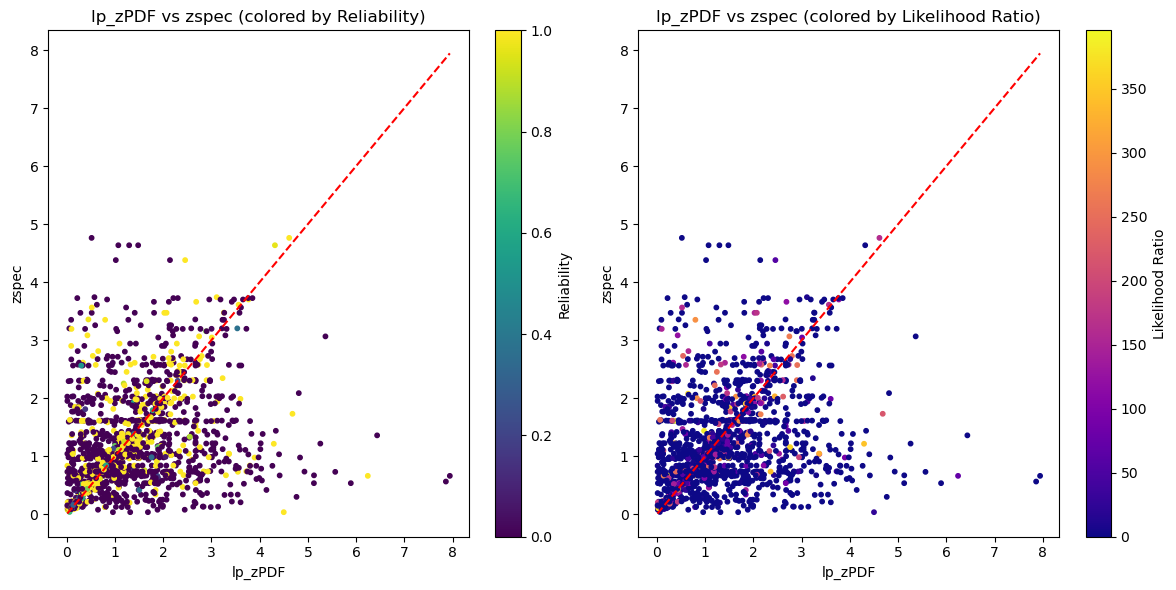

In [45]:

lp_zPDF = redshift_h20_cdfs["lp_zPDF"]
zspec = redshift_h20_cdfs["zspec"]
LR = redshift_h20_cdfs["LR"]
Rel = redshift_h20_cdfs["Rel"]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

scatter1 = axs[0].scatter(lp_zPDF, zspec, c=Rel, cmap='viridis', s=10)
axs[0].set_xlabel('lp_zPDF')
axs[0].set_ylabel('zspec')
axs[0].set_title('lp_zPDF vs zspec (colored by Reliability)')
axs[0].plot([min(lp_zPDF), max(lp_zPDF)], [min(lp_zPDF), max(lp_zPDF)], color='red', linestyle='--')
cbar1 = fig.colorbar(scatter1, ax=axs[0])
cbar1.set_label('Reliability')

scatter2 = axs[1].scatter(lp_zPDF, zspec, c=LR, cmap='plasma', s=10)
axs[1].set_xlabel('lp_zPDF')
axs[1].set_ylabel('zspec')
axs[1].set_title('lp_zPDF vs zspec (colored by Likelihood Ratio)')
axs[1].plot([min(lp_zPDF), max(lp_zPDF)], [min(lp_zPDF), max(lp_zPDF)], color='red', linestyle='--')
cbar2 = fig.colorbar(scatter2, ax=axs[1])
cbar2.set_label('Likelihood Ratio')

plt.tight_layout()
plt.show()


### Computing accuracy of LYR by eliminating matches where redshifts don't match well

In [46]:
redshift_h20_cdfs['residuals'] = np.abs(redshift_h20_cdfs['lp_zPDF'] - redshift_h20_cdfs['zspec'])
threshold_multiplier = 0.1
threshold = threshold_multiplier * redshift_h20_cdfs['residuals'].std()


redshift_h20_cdfs_filtered = redshift_h20_cdfs[redshift_h20_cdfs['residuals'] <= threshold]

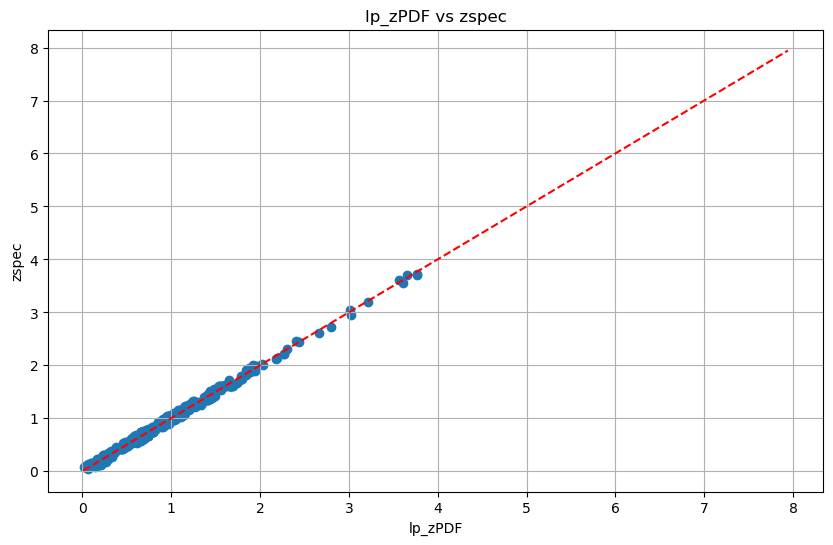

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, x_values, color='red', linestyle='--', label='x=y line')
plt.scatter(redshift_h20_cdfs_filtered["lp_zPDF"], redshift_h20_cdfs_filtered["zspec"])
plt.xlabel('lp_zPDF')
plt.ylabel('zspec')
plt.title('lp_zPDF vs zspec')
plt.grid(True)
plt.show()

In [48]:
accuracy = len(redshift_h20_cdfs) - len(redshift_h20_cdfs_filtered)
accuracy = accuracy / len(redshift_h20_cdfs)
accuracy = accuracy * 100

print("accuracy: ", accuracy, "%")

accuracy:  71.52317880794702 %
